<a href="https://colab.research.google.com/github/jazu1412/EDA_Data_Prep_Visual/blob/main/timeseries_analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install --upgrade pandas # Reinstall pandas to use the updated NumPy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 81.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.20.0 requires numpy>=1.23.0, but you have numpy 1.22.4 which is incompatible.
arviz 0.20.0 requires scipy>=1.9.0, but you have scipy 1.7.3 which is incompatible.
autoviml 0.1.800 requires numpy>=1.24, but you have numpy 1.22.4 which is incompatible.
autoviml 0.1.800 requires pandas<2.0,>=1.1.3, but you have pandas 2.2.3 which is incompatible.
bigframes 1.25.0 requires numpy>=1.24.0, but you have numpy 1.22.4 which is incompatible.
cudf-cu12 24.10.1 requires numpy<3.0a0,>=1.23, but you have numpy 1.22.

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('raw_sales.csv')
data.head()


,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


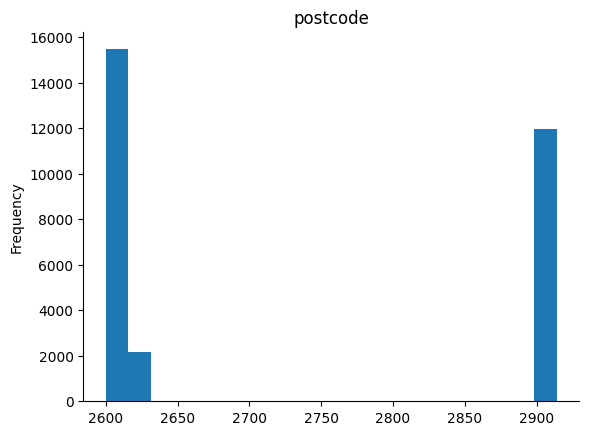

In [ ]:
# @title postcode

from matplotlib import pyplot as plt
data['postcode'].plot(kind='hist', bins=20, title='postcode')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Display the column names to find the correct date column
print(data.columns)
data['Date'] = pd.to_datetime(data['datesold'])

Index(['datesold', 'postcode', 'price', 'propertyType', 'bedrooms'], dtype='object')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datesold      29580 non-null  object        
 1   postcode      29580 non-null  int64         
 2   price         29580 non-null  int64         
 3   propertyType  29580 non-null  object        
 4   bedrooms      29580 non-null  int64         
 5   Date          29580 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 1.4+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datesold      29580 non-null  object        
 1   postcode      29580 non-null  int64         
 2   price         29580 non-null  int64         
 3   propertyType  29580 non-null  object        
 4   bedrooms      29580 non-null  int64         
 5   Date          29580 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 1.4+ MB
None
           postcode         price      bedrooms
count  29580.000000  2.958000e+04  29580.000000
mean    2730.249730  6.097363e+05      3.250169
std      146.717292  2.817079e+05      0.951275
min     2600.000000  5.650000e+04      0.000000
25%     2607.000000  4.400000e+05      3.000000
50%     2615.000000  5.500000e+05      3.000000
75%     2905.000000  7.050000e+05      4.000000
max     2914.000000  8.000000e+06 

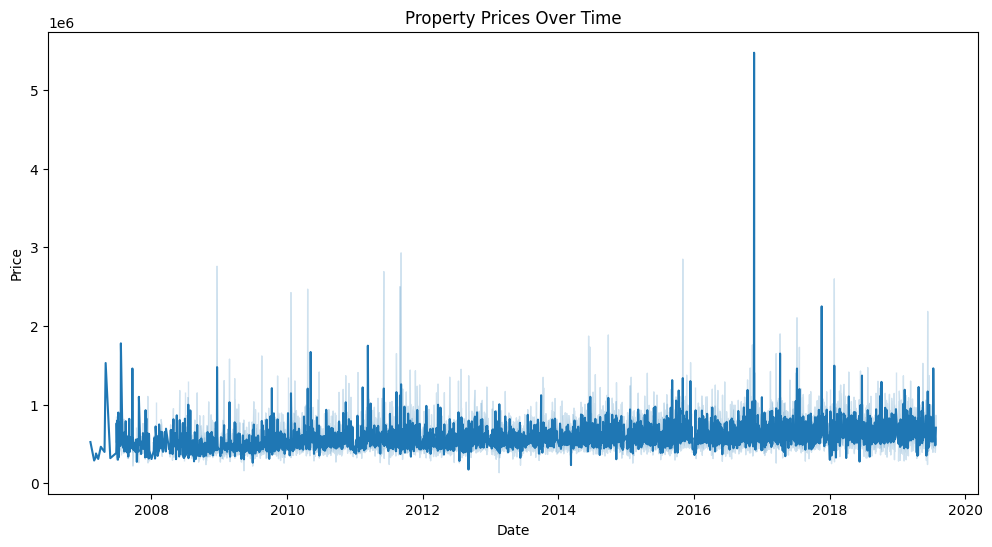

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and convert 'datesold' to datetime format
data = pd.read_csv('raw_sales.csv')
data['Date'] = pd.to_datetime(data['datesold'])

# Initial data inspection
print(data.info())
print(data.describe())

# Visualize the time series (price over time)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='price', data=data)
plt.title('Property Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()



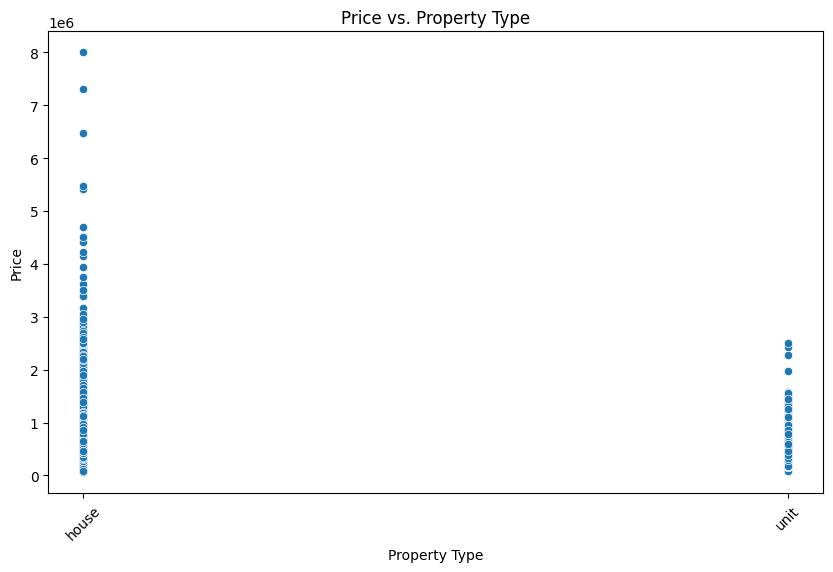

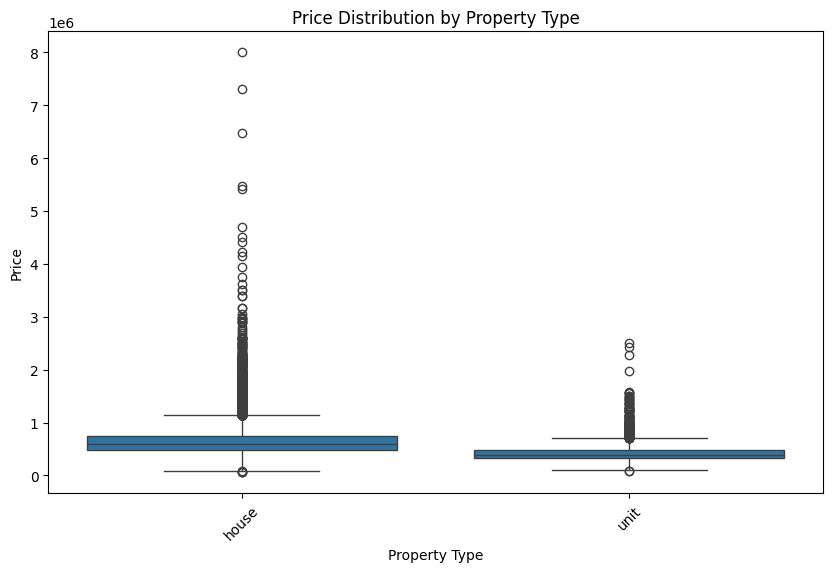

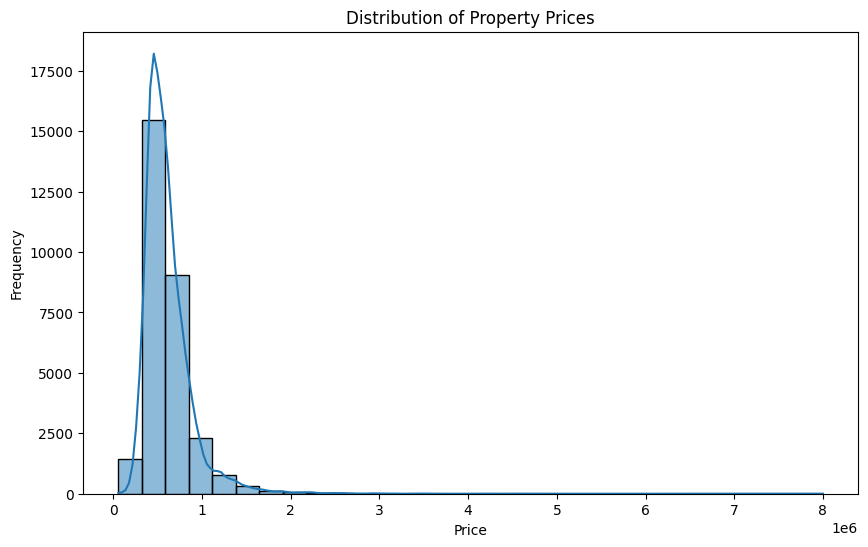

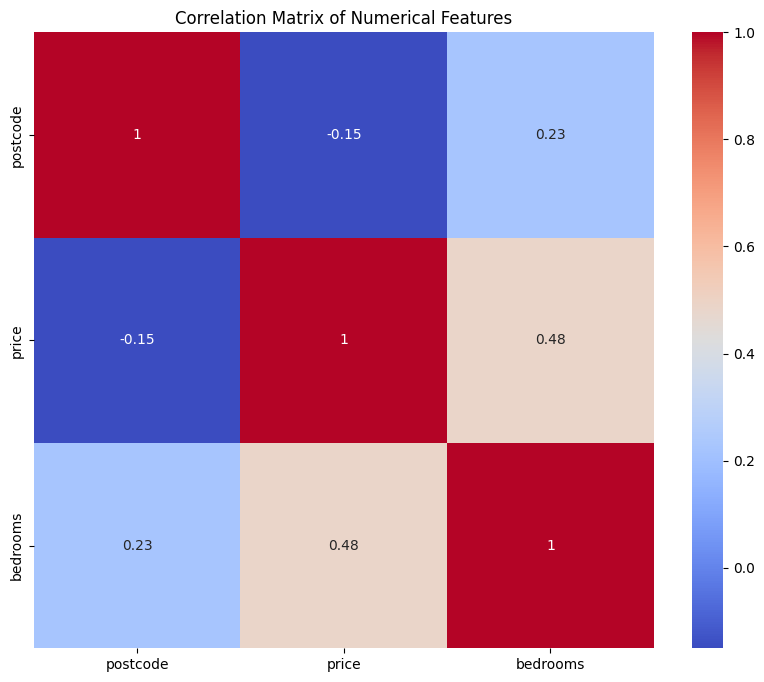

In [ ]:
# prompt: Generate some more plots for the above data EDA

# Create a scatter plot of price vs. property type
plt.figure(figsize=(10, 6))
sns.scatterplot(x='propertyType', y='price', data=data)
plt.title('Price vs. Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Create a box plot of price by property type
plt.figure(figsize=(10, 6))
sns.boxplot(x='propertyType', y='price', data=data)
plt.title('Price Distribution by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Create a histogram of property prices
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Create a heatmap of the correlation between numerical features
numerical_features = data.select_dtypes(include=['number'])
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

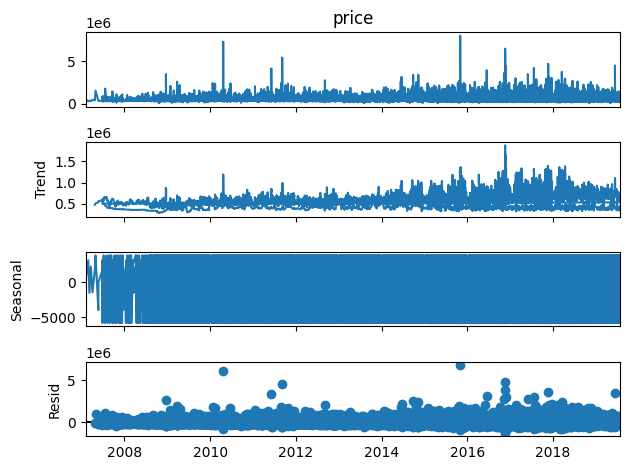

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set 'Date' as the index to simplify time series processing
data.set_index('Date', inplace=True)

# Decompose the series (assuming monthly frequency, adjust if necessary)
decomposition = seasonal_decompose(data['price'], model='additive', period=12)
decomposition.plot()
plt.show()


In [ ]:
# Check for missing values
print(data.isnull().sum())

# If there are missing values in 'price', fill with interpolation
data['price'].interpolate(method='linear', inplace=True)


datesold        0
postcode        0
price           0
propertyType    0
bedrooms        0
Date            0
dtype: int64


In [ ]:
# Reset the index if you want to keep 'Date' as a column
data.reset_index(inplace=True)

# Extract month and day of week as new features
data['month'] = data['Date'].dt.month
data['day_of_week'] = data['Date'].dt.dayofweek


In [ ]:
# Set train size as 80% of data
train_size = int(len(data) * 0.8)
train = data[:train_size]
test = data[train_size:]

# Separate target variable 'price' for train and test
train_X = train.drop(columns=['price'])
train_y = train['price']
test_X = test.drop(columns=['price'])
test_y = test['price']


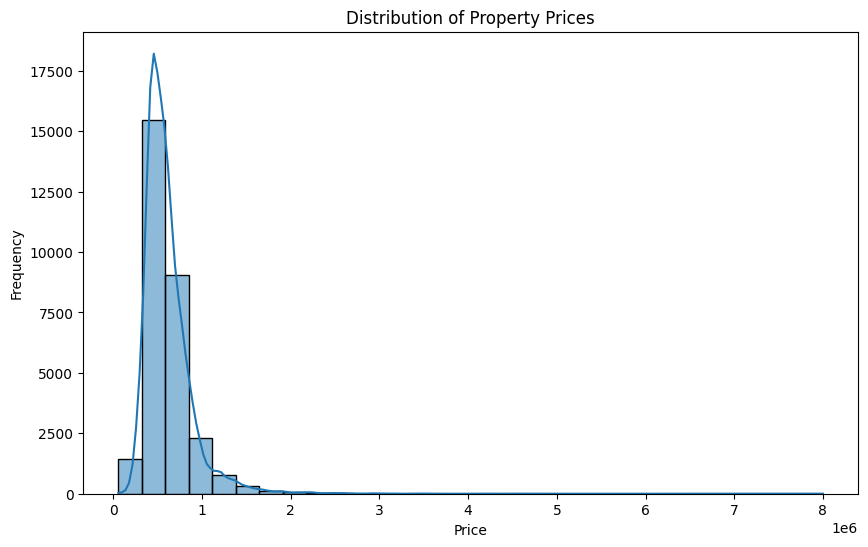

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

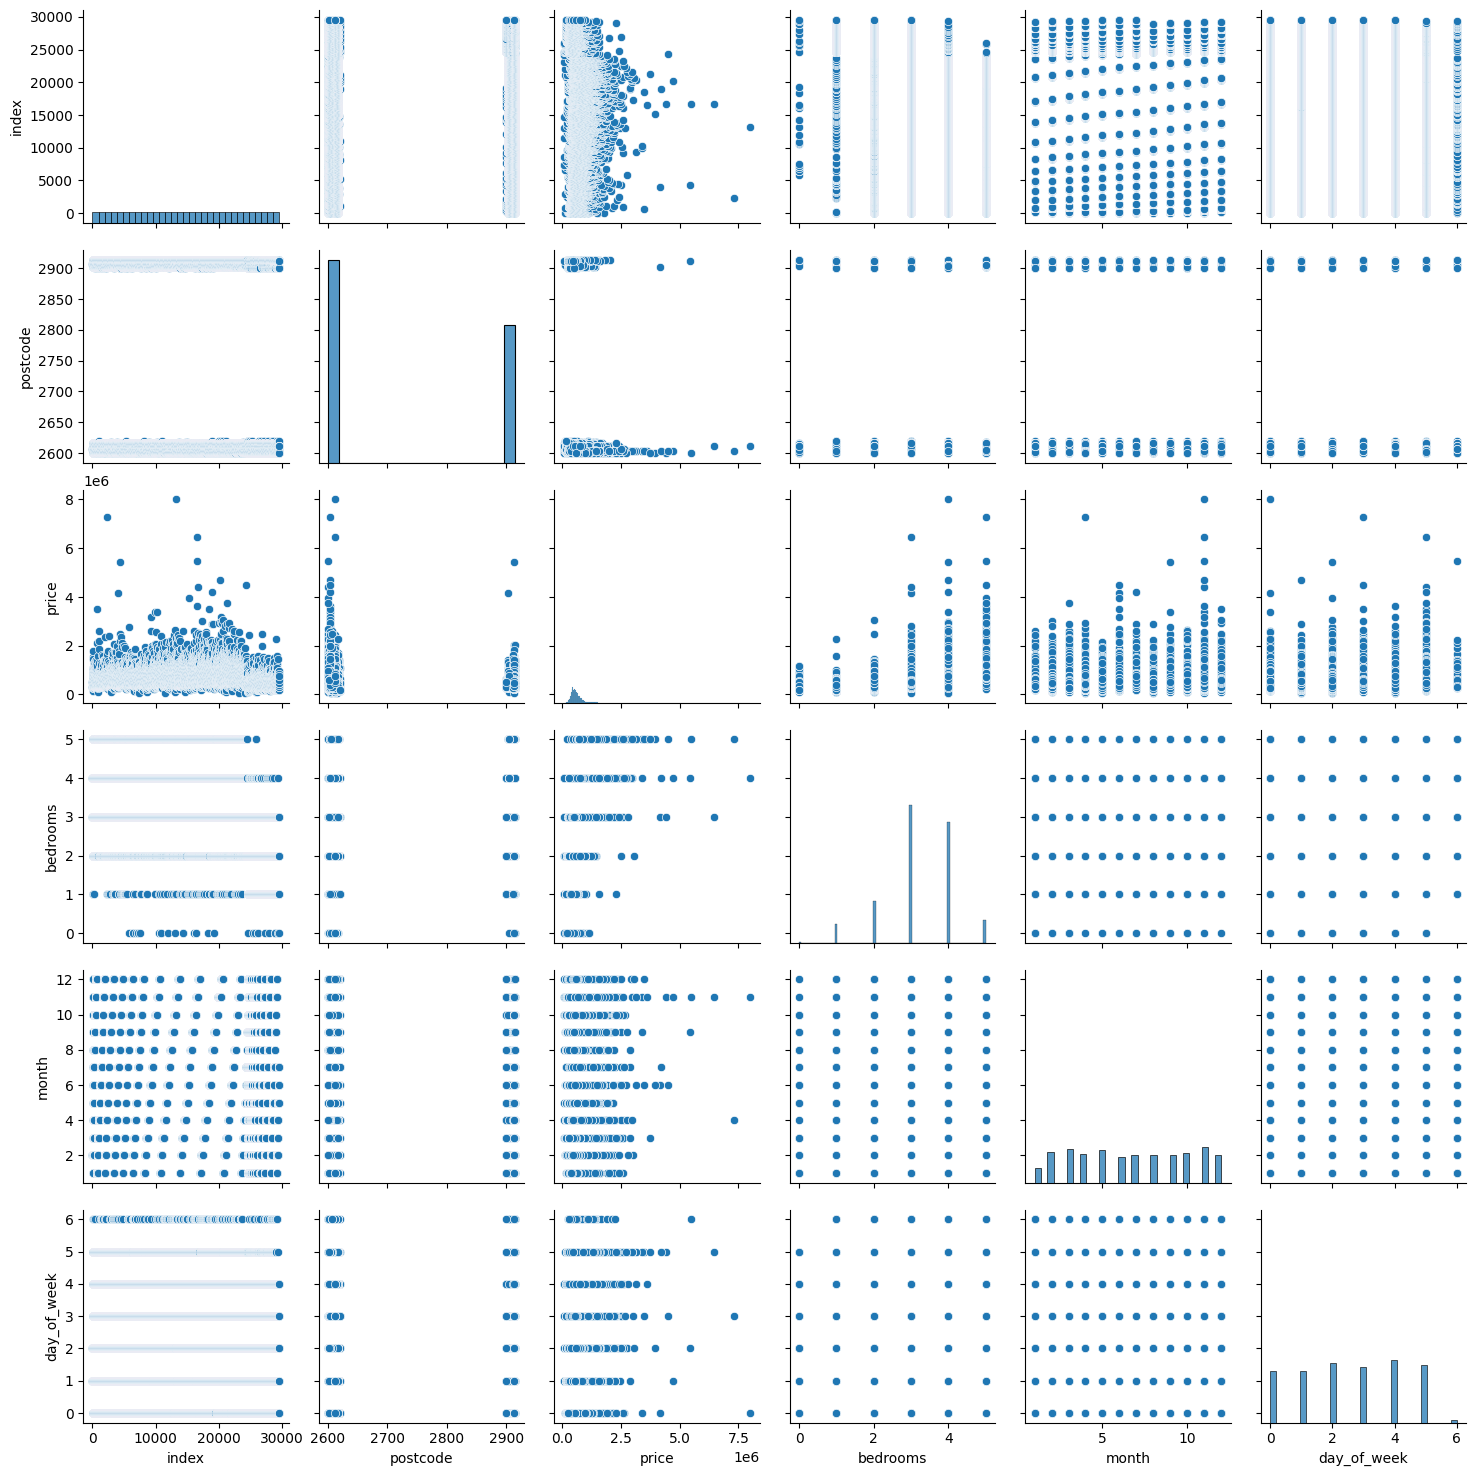

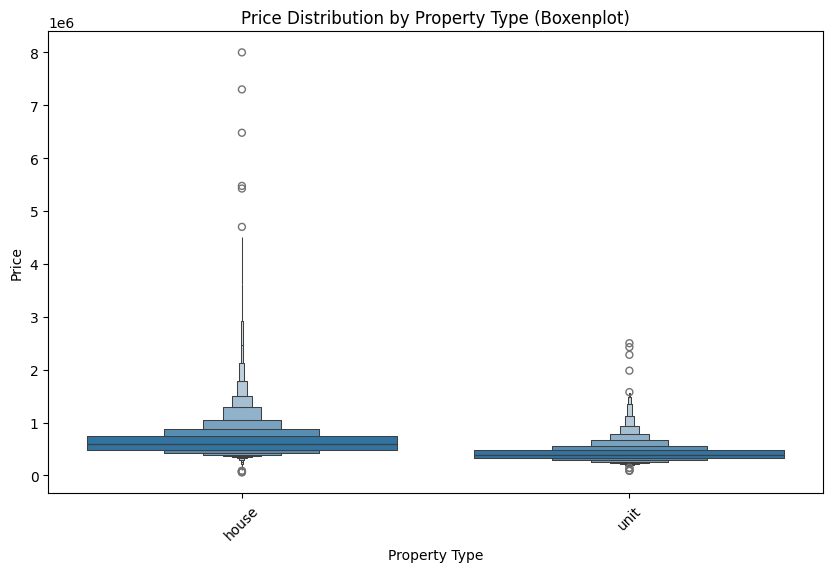

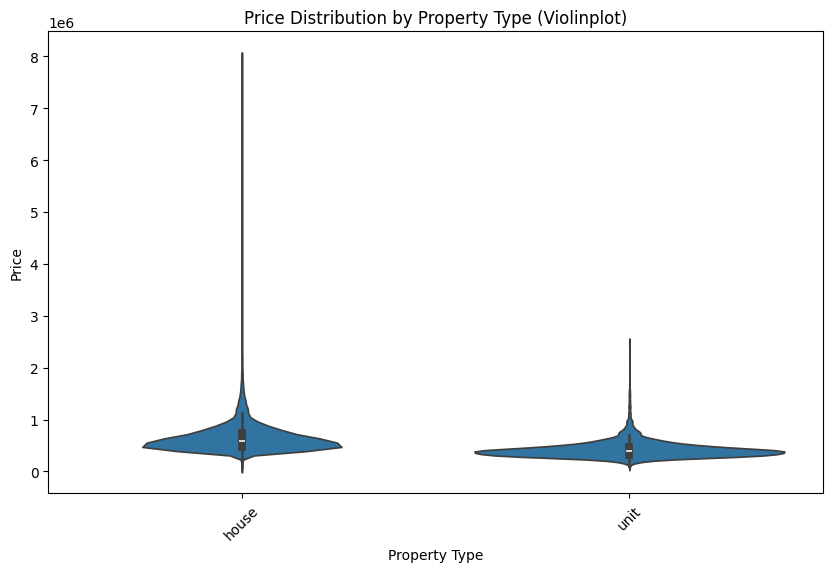

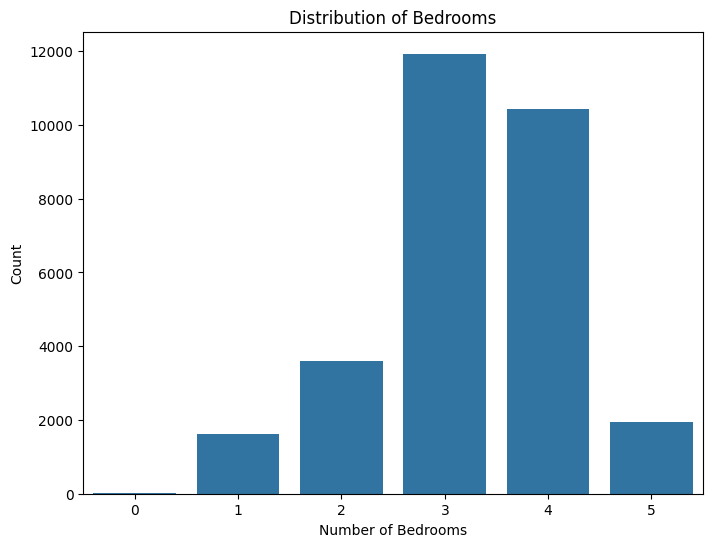

In [ ]:


# Create a pairplot to visualize relationships between numerical features
numerical_features = data.select_dtypes(include=['number'])
sns.pairplot(numerical_features)
plt.show()


# Create a boxenplot of price by property type (more robust to outliers than a boxplot)
plt.figure(figsize=(10, 6))
sns.boxenplot(x='propertyType', y='price', data=data)
plt.title('Price Distribution by Property Type (Boxenplot)')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


# Create a violinplot of price by property type (shows density of price distribution)
plt.figure(figsize=(10, 6))
sns.violinplot(x='propertyType', y='price', data=data)
plt.title('Price Distribution by Property Type (Violinplot)')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Plot the distribution of 'bedrooms'
plt.figure(figsize=(8, 6))
sns.countplot(x='bedrooms', data=data)
plt.title('Distribution of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()



In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
result = adfuller(data['price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# A p-value < 0.05 suggests the data is stationary
if result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is non-stationary.")


ADF Statistic: -10.435026739473496
p-value: 1.5745251680570247e-18
The time series is stationary.


In [ ]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values with linear interpolation
data['price'].interpolate(method='linear', inplace=True)


index           0
datesold        0
postcode        0
price           0
propertyType    0
bedrooms        0
Date            0
month           0
day_of_week     0
dtype: int64


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('raw_sales.csv')

# Drop irrelevant columns if any, like 'Date' or 'ID'
data = data.drop(columns=['Date', 'ID'], errors='ignore')  # Replace with actual names if necessary

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

# One-hot encode categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

Categorical columns: Index(['datesold', 'propertyType'], dtype='object')


In [ ]:
# Define upper and lower thresholds (e.g., 1st and 99th percentiles)
lower_limit = data['price'].quantile(0.01)
upper_limit = data['price'].quantile(0.99)

# Filter outliers
data = data[(data['price'] >= lower_limit) & (data['price'] <= upper_limit)]


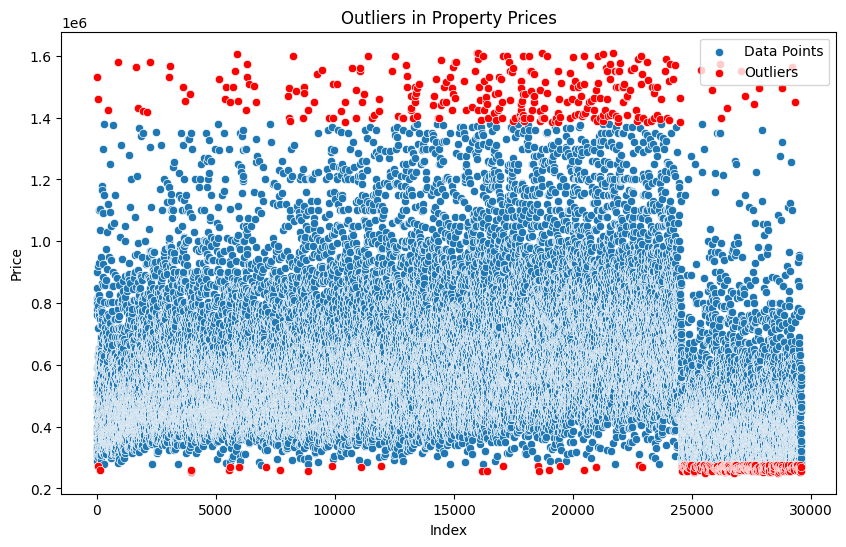

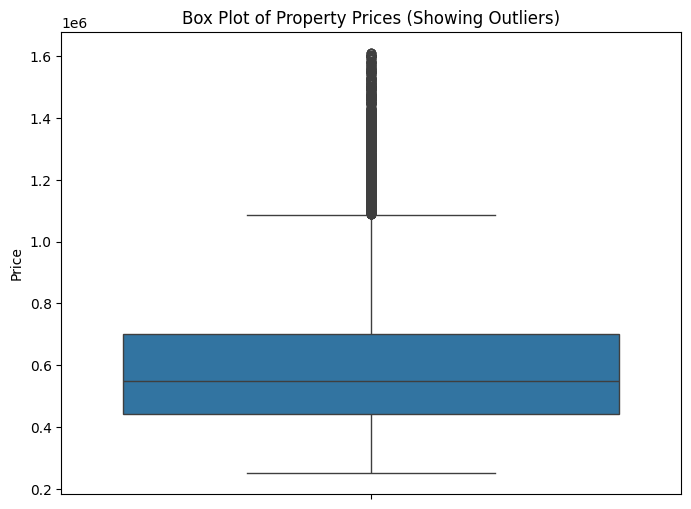

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming it's already loaded as 'data' in your previous code)
# If not, load it here: data = pd.read_csv('raw_sales.csv')

# Define upper and lower thresholds for outlier detection (e.g., 1st and 99th percentiles)
lower_limit = data['price'].quantile(0.01)
upper_limit = data['price'].quantile(0.99)

# Identify outliers
outliers = data[(data['price'] < lower_limit) | (data['price'] > upper_limit)]

# Visualize outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data.index, y='price', data=data, label='Data Points')
sns.scatterplot(x=outliers.index, y='price', data=outliers, color='red', label='Outliers')
plt.title('Outliers in Property Prices')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()


# Box plot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y='price', data=data)
plt.title('Box Plot of Property Prices (Showing Outliers)')
plt.ylabel('Price')
plt.show()

In [ ]:
from sklearn.ensemble import IsolationForest

# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=0)  # Set contamination level
data_encoded['anomaly'] = iso_forest.fit_predict(data_scaled)

# Convert anomaly labels: 1 for normal data, -1 for anomaly
data_encoded['anomaly'] = data_encoded['anomaly'].apply(lambda x: 1 if x == -1 else 0)

# Count anomalies
print(f"Number of anomalies detected: {data_encoded['anomaly'].sum()}")
print(f"Percentage of anomalies: {100 * data_encoded['anomaly'].mean():.2f}%")


Number of anomalies detected: 1461
Percentage of anomalies: 4.94%


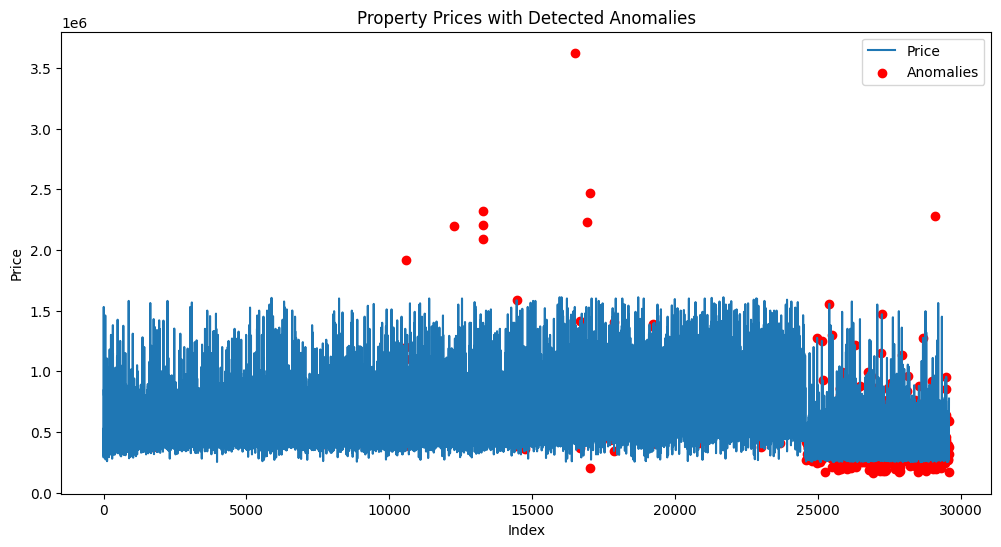

In [ ]:


# Visualize anomalies
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['price'], label='Price')
plt.scatter(data_encoded[data_encoded['anomaly'] == 1].index,
            data_encoded[data_encoded['anomaly'] == 1]['price'],
            color='red', label='Anomalies')
plt.title('Property Prices with Detected Anomalies')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# Apply first-order differencing if non-stationary
data['price_diff'] = data['price'].diff().dropna()

# Check stationarity again after differencing
result_diff = adfuller(data['price_diff'].dropna())
print('ADF Statistic (after differencing):', result_diff[0])
print('p-value (after differencing):', result_diff[1])


ADF Statistic (after differencing): -41.72047650346939
p-value (after differencing): 0.0


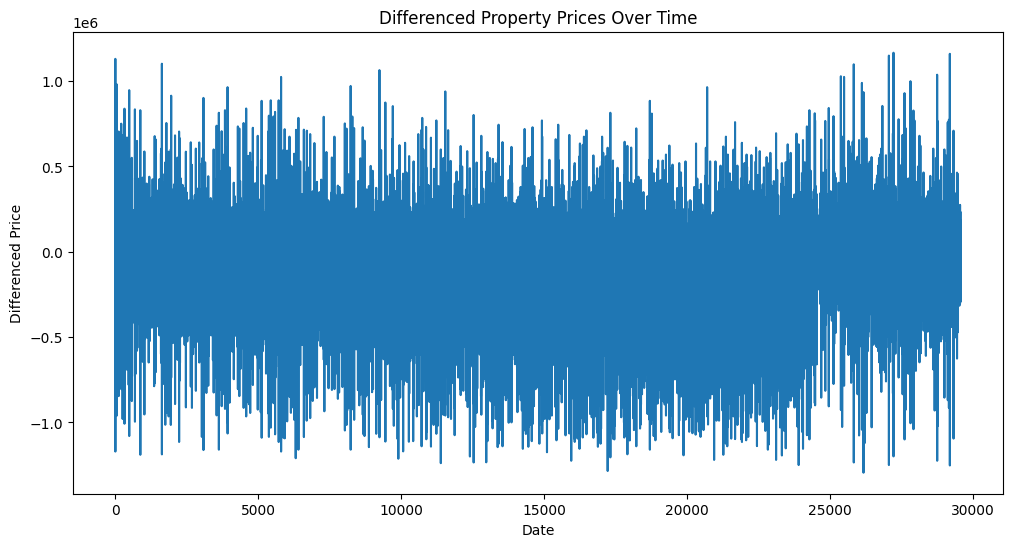

In [ ]:
# Plot the differenced data if applicable
plt.figure(figsize=(12, 6))
sns.lineplot(x=data.index, y='price_diff', data=data)
plt.title('Differenced Property Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Differenced Price')
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Train an ARIMA model (adjust the order based on ACF/PACF findings)
model = ARIMA(train['price'], order=(5, 1, 0))  # Modify order as necessary
arima_model = model.fit()

# Forecast for the test set length
forecast = arima_model.forecast(steps=len(test))


In [ ]:
print(forecast)

23664    690633.089843
23665    695486.731774
23666    688059.641410
23667    654235.074089
23668    654091.521574
             ...      
29575    671031.807463
29576    671031.807463
29577    671031.807463
29578    671031.807463
29579    671031.807463
Name: predicted_mean, Length: 5916, dtype: float64


In [ ]:
# Create lag features for supervised learning
data['price_lag1'] = data['price'].shift(1)
data['price_lag2'] = data['price'].shift(2)
data.dropna(inplace=True)  # Drop rows with NaN due to lagging


In [ ]:
# Redefine train and test sets after adding lag features
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

train_X = train.drop(columns=['price'])
train_y = train['price']
test_X = test.drop(columns=['price'])
test_y = test['price']


In [ ]:
!pip install autoviml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 581.2 kB/s eta 0:00:00
INFO: pip is looking at multiple versions of imbalanced-ensemble to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.6/134.6 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 746.5/746.5 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.

In [ ]:
!pip uninstall -y scipy
!pip install scipy==1.7.3

Found existing installation: scipy 1.13.1
Uninstalling scipy-1.13.1:
  Successfully uninstalled scipy-1.13.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 41.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.19 requires numpy>=1.24.4, but you have numpy 1.22.4 which is incompatible.
albumentations 1.4.20 requires numpy>=1.24.4, but you have numpy 1.22.4 which is incompatible.
albumentations 1.4.20 requires scipy>=1.10.0, but you have scipy 1.7.3 which is incompatible.
arviz 0.20.0 requires numpy>=1.23.0, but you have numpy 1.22.4 which is incompatible.
arviz 0.20.0 requires scipy>=1.9.0, but you

In [ ]:
!pip uninstall -y numpy # Uninstall current NumPy version
!pip install numpy==1.22.4 # Install NumPy 1.22.4

Found existing installation: numpy 1.23.0
Uninstalling numpy-1.23.0:
  Successfully uninstalled numpy-1.23.0
  Using cached numpy-1.22.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.0 kB)
Using cached numpy-1.22.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.19 requires numpy>=1.24.4, but you have numpy 1.22.4 which is incompatible.
albumentations 1.4.20 requires numpy>=1.24.4, but you have numpy 1.22.4 which is incompatible.
albumentations 1.4.20 requires scipy>=1.10.0, but you have scipy 1.7.3 which is incompatible.
arviz 0.20.0 requires numpy>=1.23.0, but you have numpy 1.22.4 which is incompatible.
arviz 0.20.0 requires scipy>=1.9.0, but you have scipy 1.7.3 which is incompatible.
astropy 6.1.4 requires numpy>=1.23, but you have numpy 1.22.4 which 

In [ ]:
import pandas as pd
from autoviml.Auto_ViML import Auto_ViML
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import numpy as np

# ... (rest of the code for data loading and preprocessing) ...

# Preprocess data before calling Auto_ViML or fallback models
date_column = 'datesold'  # Assuming 'datesold' is the date column name

# Convert 'datesold' to numerical features in train_data and test_X
def preprocess_date_column(df, date_column):
    if date_column in df.columns:
        df[date_column] = pd.to_datetime(df[date_column])
        df['dayofweek'] = df[date_column].dt.dayofweek
        df['month'] = df[date_column].dt.month
        df['year'] = df[date_column].dt.year
        df = df.drop(columns=[date_column])
    return df

train_data = preprocess_date_column(train_data, date_column)
test_X = preprocess_date_column(test_X, date_column)

# Update train_X and train_y after preprocessing
train_X = train_data.drop(columns=['price'])  # Assuming 'price' is your target
train_y = train_data['price']

# Run AutoViML
try:
    model, features, trainm, testm = Auto_ViML(
        train=train_data,
        target='price',
        test=test_X,
        scoring_parameter='r2',
        hyper_param='RS',
        feature_reduction=False,
        Boosting_Flag=True,
        verbose=1
    )
except Exception as e:

    print("Selected features:", features)



##############  D A T A   S E T  A N A L Y S I S  #######################
ALERT! Changing hyperparameter search to RS. Otherwise XGBoost will take too long for 10,000+ rows.
Training Set Shape = (23191, 10)
    Training Set Memory Usage = 2.45 MB
Test Set Shape = (5916, 9)
    Test Set Memory Usage = 0.41 MB
Single_Label Target: ['price']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  4
    Number of String-Categorical Columns =  0
    Number of Fac